In [3]:
import pandas as pd
import ipywidgets as widgets
import importlib
import functions
% matplotlib inline
import IPython.display

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="."></form>''')


## Important: Select your dataset ID in this menu before running the analysis below.

In [5]:
dataset_id = widgets.Dropdown(options=range(1, 7))
display(dataset_id)

Dropdown(options=(1, 2, 3, 4, 5, 6), value=1)

# Diet

Next, you'll figure out what kind of food your animal has eaten.

We often do this using **digestive bacteria** - these are helpful bacteria which help our bodies digest food.

Different animals need different bacteria.

Animals which eat meat need to digest more **protein**

Animals which eat plants need to digest more **cellulose**

## Identify diet using digestive bacteria

We will look for 44 common digestive bacteria in our samples - this will help us find out a lot about the animal's diet.

The matrix below shows which bacteria are present in some example animals.

1 = this animal has this bacterium

0 = this animal doesn't have this bacterium

In [7]:
matrix = pd.read_csv("../data/matrix_db.txt", sep="\t", index_col=0)
matrix.columns = [c.replace("_", " ") for c in matrix.columns]
matrix.index = [c.replace("_", " ") for c in matrix.index.values]
matrix[matrix.columns[:-1]].T

importlib.reload(functions)
button = widgets.Button(description="Show table",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = IPython.display.display(matrix)
button.on_click(onbuttonclick)
button.style.button_color = '#f5de83'
b = display(button)

Button(description='Show table', layout=Layout(height='50px', width='300px'), style=ButtonStyle(button_color='#f5de83'))

,Ruminococcus flavefaciens,Lentimicrobium saccharophilum,Akkermansia muciniphila,Kiritimatiella glycovorans,Brevundimonas naejangsanensis,Muribaculum intestinale,Ruminococcus champanellensis,Pseudomonas nitroreducens,Massilioclostridium coli,Clostridium saccharolyticum,...,Catenibacterium mitsuokai,Treponema succinifaciens,Anaerostipes hadrus,Dialister succinatiphilus,Coprococcus comes,Clostridium ventriculi,Intestinibacter bartlettii,Turicibacter sanguinis,Sporobacter termitidis,colour
leopard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,#fd4a1e
wild dog,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,#fd4a1e
lion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,#fd4a1e
black bear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,#fd4a1e
polar bear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,#fd4a1e
donkey,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,#228b22
zebra,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,#228b22
deer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,#228b22
colobus monkey,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,#228b22
gorilla,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,#228b22


[alternative link](../data/matrix_db.txt)

This is not a very easy way to see the data!

Click on the button below to see the data as a graph instead.

Button(description='View data as graph', layout=Layout(height='50px', width='300px'), style=ButtonStyle(button_color='#f5de83'))

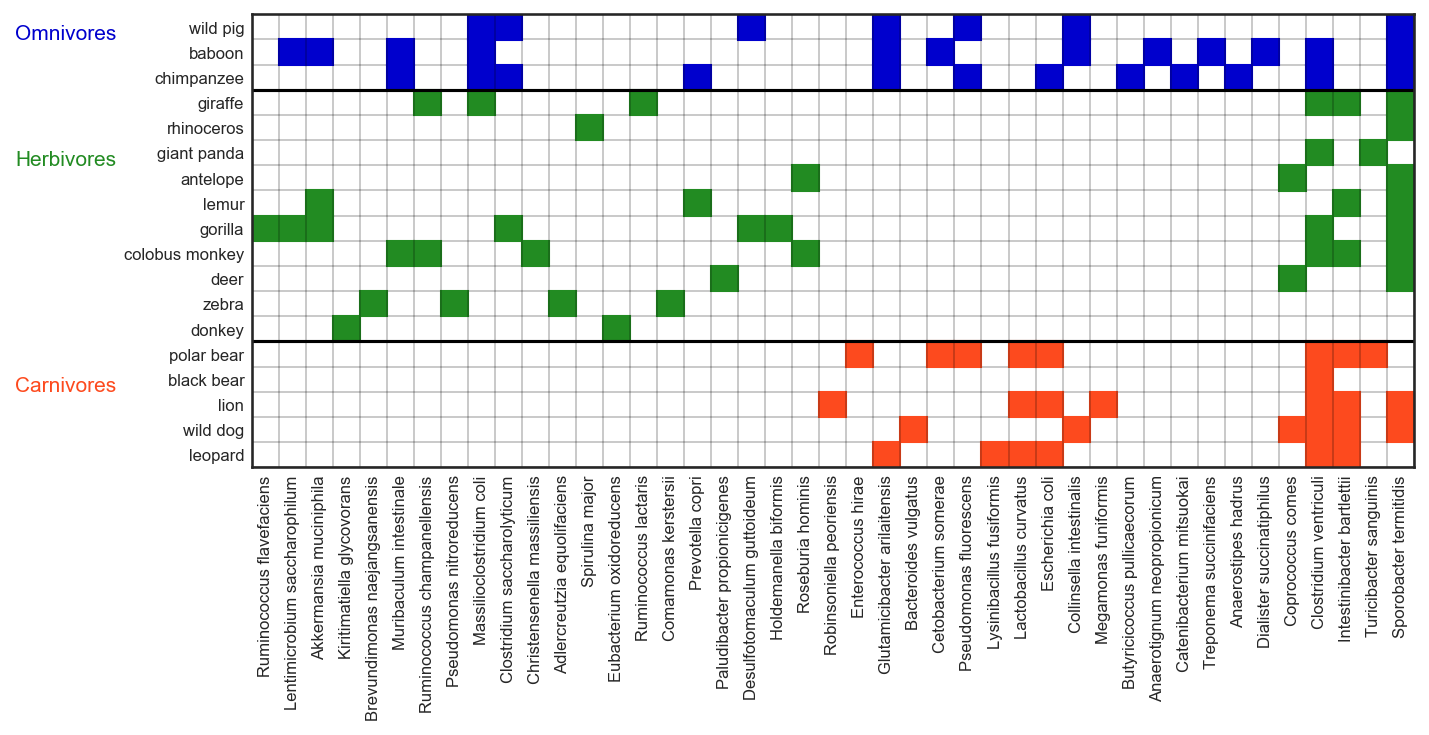

In [10]:
importlib.reload(functions)
button = widgets.Button(description="View data as graph",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.plotMatrix()
button.on_click(onbuttonclick)
button.style.button_color = '#f5de83'
b = display(button)

[alternative link](matrix.png)

Now it is much easier to see the bacteria present in each species.

Clicking the button below will add the data from your dataset to this graph.

Button(description='Add dataset to graph', layout=Layout(height='50px', width='300px'), style=ButtonStyle(button_color='#f5de83'))

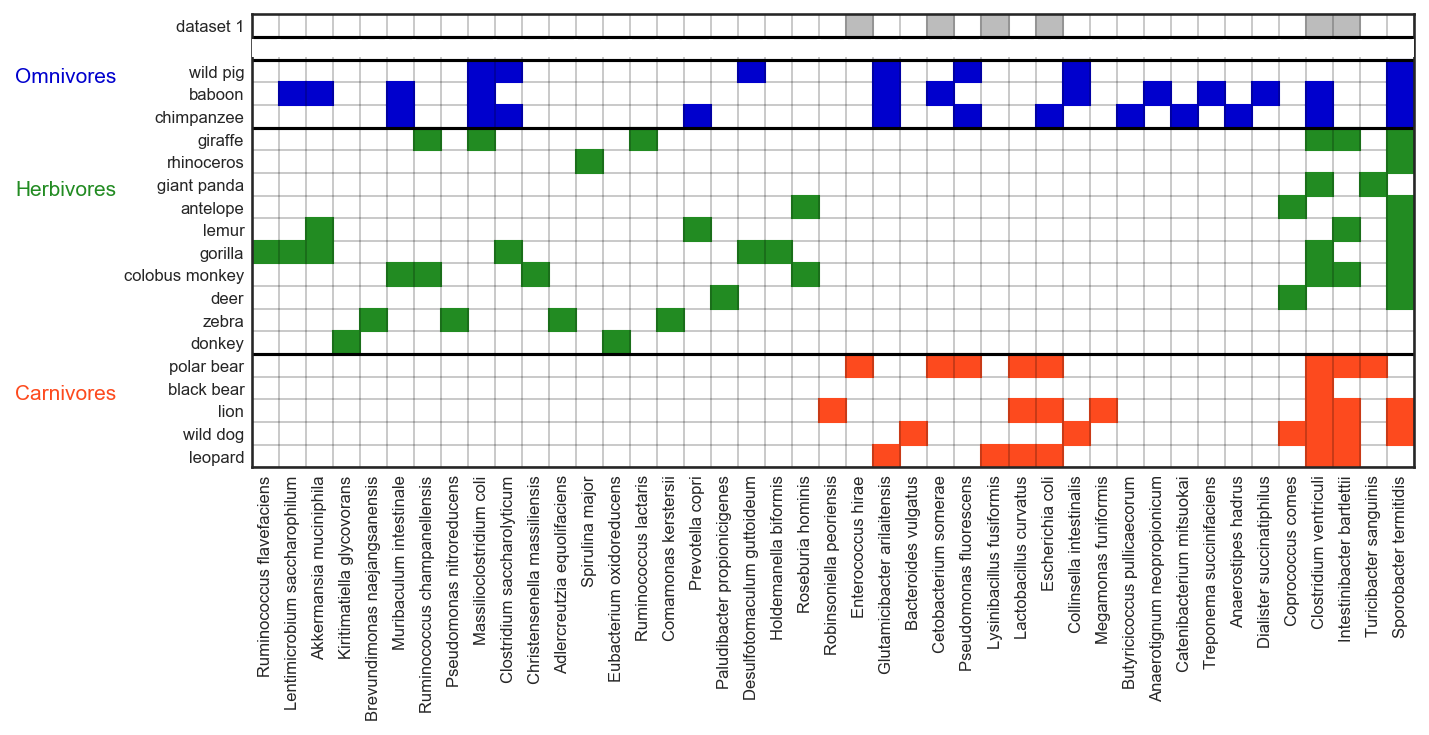

In [11]:
importlib.reload(functions)
button = widgets.Button(description="Add dataset to graph",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.plotMatrix(dataset=dataset_id.value)
button.on_click(onbuttonclick)
button.style.button_color = '#f5de83'
b = display(button)

[alternative link dataset 1](1_matrix.png)
[alternative link dataset 2](2_matrix.png)
[alternative link dataset 3](3_matrix.png)
[alternative link dataset 4](4_matrix.png)
[alternative link dataset 5](5_matrix.png)
[alternative link dataset 6](6_matrix.png)

This gives us a good idea about whether our animals are carnivores, herbivores or omnivores.

# Look for viruses from food

By now you should have a good idea if your animal is a carnivore, herbivore or omnivore.

You can now screen your sample for viruses the animal might have picked up from their food.

If the sample is a herbivore, you only need to look for viruses which are common in plants.

If the sample is a carnivore, you only need to look for viruses which are common in meat and fish.

If the sample is an omnivore, or if you don't know, you can look for both.

Choose below if you think your sample is a carnivore, herbivore or omnivore and the app will map to some viruses from that type of food.

In [14]:
importlib.reload(functions)
button = widgets.Button(description="Match Reads to Reference Sequences!",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

diet = widgets.Dropdown(options=['carnivore', 'herbivore', 'omnivore'])


def onbuttonclick(b):
    r = functions.mapReadsDisplay(dataset_id.value, '../data/food.fasta', typ='food', diet=diet.value)
button.on_click(onbuttonclick)
button.style.button_color = '#f5de83'
b = display(widgets.VBox([diet, button]))

VBox(children=(Dropdown(options=('carnivore', 'herbivore', 'omnivore'), value='carnivore'), Button(description='Match Reads to Reference Sequences!', layout=Layout(height='50px', width='300px'), style=ButtonStyle(button_color='#f5de83'))))

Loading data....

Loaded 40,000 reads
Mapping reads...

1 / 18: Mapping reads to Soybean dwarf virus
0 reads identified matching Soybean dwarf virus
0 reads identified in total

2 / 18: Mapping reads to Bean yellow mosaic virus
0 reads identified matching Bean yellow mosaic virus
0 reads identified in total

3 / 18: Mapping reads to Soybean mosaic virus
0 reads identified matching Soybean mosaic virus
0 reads identified in total

4 / 18: Mapping reads to Wheat dwarf virus
0 reads identified matching Wheat dwarf virus
0 reads identified in total

5 / 18: Mapping reads to Wheat streak mosaic virus
0 reads identified matching Wheat streak mosaic virus
0 reads identified in total

6 / 18: Mapping reads to Barley yellow dwarf virus
0 reads identified matching Barley yellow dwarf virus
0 reads identified in total

7 / 18: Mapping reads to Panicum mosaic virus
0 reads identified matching Panicum mosaic virus
0 reads identified in total

8 / 18: Mapping reads to St augustine grass virus
0 read

Here are the results in a table

In [15]:
importlib.reload(functions)
button = widgets.Button(description="Show table",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.showMappingTable(dataset_id.value, option=1, typ='food', diet=diet.value)
button.on_click(onbuttonclick)
button.style.button_color = '#f5de83'
b = display(button)

Button(description='Show table', layout=Layout(height='50px', width='300px'), style=ButtonStyle(button_color='#f5de83'))

,Reference Microbe,Number of Reads in Sample
0,Seoul_virus,0
1,Mouse_mammary_tumor_virus,0
2,Shrimp_hemocyte_virus,1865
3,Rabbit_calcivirus,921
5,Rabbit_virus_1,691
8,Mouse_virus_1,0
9,Chicken_virus_1,666
14,Salmon_isavirus,2134
15,Mouse_leukaemia_virus,0
17,Shrimp_virus_1,0


,Reference Microbe,Number of Reads in Sample
0,Seoul_virus,0
1,Mouse_mammary_tumor_virus,0
2,Shrimp_hemocyte_virus,1865
3,Rabbit_calcivirus,921
5,Rabbit_virus_1,691
8,Mouse_virus_1,0
9,Chicken_virus_1,666
14,Salmon_isavirus,2134
15,Mouse_leukaemia_virus,0
17,Shrimp_virus_1,0


[alternative link dataset 1](1_mapping_table_food.tsv), 
[alternative link dataset 2](2_mapping_table_food.tsv), 
[alternative link dataset 3](3_mapping_table_food.tsv), 
[alternative link dataset 4](4_mapping_table_food.tsv), 
[alternative link dataset 5](5_mapping_table_food.tsv), 
[alternative link dataset 6](6_mapping_table_food.tsv)

Now we can count how many viruses we saw from each possible food.

Button(description='Show Graph', layout=Layout(height='50px', width='300px'), style=ButtonStyle(button_color='#f5de83'))

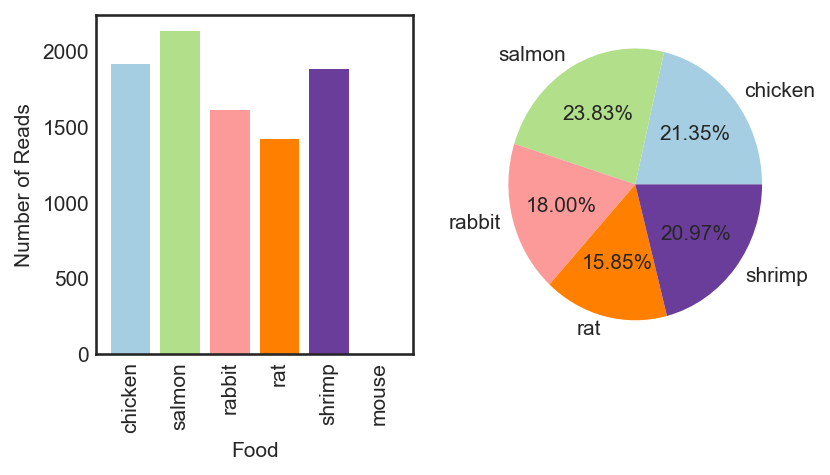

In [17]:
importlib.reload(functions)
button = widgets.Button(description="Show Graph",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))


def onbuttonclick(b):
    r = functions.plotFood(dataset_id.value, diet.value)
button.on_click(onbuttonclick)
button.style.button_color = '#f5de83'
b = display(button)

[alternative link dataset 1](food_d1.png), 
[alternative link dataset 2](food_d2.png), 
[alternative link dataset 3](food_d3.png), 
[alternative link dataset 4](food_d4.png), 
[alternative link dataset 5](food_d5.png), 
[alternative link dataset 6](food_d6.png)

From this chart, you should get a pretty good idea what your animal species has been eating!

Remember to save or print your graphs.